In [9]:
import sqlite3

# Connect to SQLite database (creates it if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [10]:
# Insert sample data
sample_data = [
    ("Product A", 10, 20.0),
    ("Product B", 5, 50.0),
    ("Product A", 3, 20.0),
    ("Product C", 7, 15.0),
    ("Product B", 2, 50.0),
    ("Product C", 4, 15.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("sales_data.db")

# SQL Query to get summary
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("sales_data.db")

# 1. Sales Summary Query
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

# Display summary
print("="*40)
print("📊 SALES SUMMARY REPORT")
print("="*40)
print(df.to_string(index=False))

# 2. Best-Selling Product by Quantity
best_seller_query = """
SELECT product, SUM(quantity) AS total_quantity
FROM sales
GROUP BY product
ORDER BY total_quantity DESC
LIMIT 1
"""
best_seller = pd.read_sql_query(best_seller_query, conn)

# Display best-seller
print("\n🏆 BEST-SELLING PRODUCT")
print("-"*40)
print(f"Product: {best_seller['product'][0]}")
print(f"Total Quantity Sold: {best_seller['total_quantity'][0]}")
print("="*40)

conn.close()

📊 SALES SUMMARY REPORT
  product  total_qty  revenue
Product A         39    780.0
Product B         21   1050.0
Product C         33    495.0

🏆 BEST-SELLING PRODUCT
----------------------------------------
Product: Product A
Total Quantity Sold: 39


<Figure size 800x500 with 0 Axes>

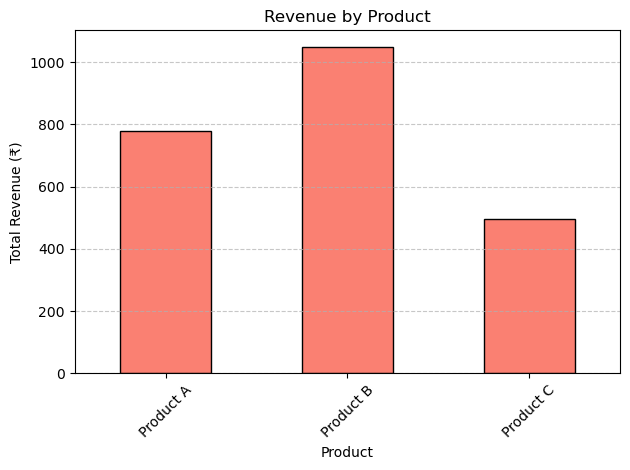

In [16]:

# Plot revenue bar chart
plt.figure(figsize=(8, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='salmon', edgecolor='black')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("sales_chart.png")
plt.show()


In [18]:
# Connect to database again
conn = sqlite3.connect("sales_data.db")

# Query: Revenue per transaction
transaction_query = """
SELECT id, product, quantity, price,
       ROUND(quantity * price, 2) AS transaction_revenue
FROM sales
ORDER BY transaction_revenue DESC
"""

transactions = pd.read_sql_query(transaction_query, conn)
conn.close()

# Display per-transaction revenue
print("\n🧾 TRANSACTION-WISE REVENUE")
print("-"*50)
print(transactions.to_string(index=False))



🧾 TRANSACTION-WISE REVENUE
--------------------------------------------------
 id   product  quantity  price  transaction_revenue
  2 Product B         5   50.0                250.0
  8 Product B         5   50.0                250.0
 14 Product B         5   50.0                250.0
  1 Product A        10   20.0                200.0
  7 Product A        10   20.0                200.0
 13 Product A        10   20.0                200.0
  4 Product C         7   15.0                105.0
 10 Product C         7   15.0                105.0
 16 Product C         7   15.0                105.0
  5 Product B         2   50.0                100.0
 11 Product B         2   50.0                100.0
 17 Product B         2   50.0                100.0
  3 Product A         3   20.0                 60.0
  6 Product C         4   15.0                 60.0
  9 Product A         3   20.0                 60.0
 12 Product C         4   15.0                 60.0
 15 Product A         3   20.0       

 # Outcome

### Created and queried a SQLite database using Python.

### Performed SQL aggregation (SUM, GROUP BY).

### Imported the results into a DataFrame.

### Created a basic matplotlib chart from the data.